In [ ]:
import pandas as pd


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1LxF2TdIqrZ71l8IQIbnVUejcpyoVVgKH/view?usp=sharing
downloaded = drive.CreateFile({'id':'1LxF2TdIqrZ71l8IQIbnVUejcpyoVVgKH'}) 
downloaded.GetContentFile('training.1600000.processed.noemoticon')  
data = pd.read_csv('training.1600000.processed.noemoticon',encoding='latin-1',header=None)

In [ ]:
text1=[]

In [ ]:
stemmer = PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for i in range(700000,900000):
    sentence = re.sub('[^a-zA-Z123456789]', ' ', data[5][i])
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [stemmer.stem(word) for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(sentence)
    text1.append(sentence)

In [ ]:
y = data[0][700000:900000]

In [ ]:
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(text1[0]).toarray()

In [ ]:
y

700000    0
700001    0
700002    0
700003    0
700004    0
         ..
899995    4
899996    4
899997    4
899998    4
899999    4
Name: 0, Length: 200000, dtype: int64

In [ ]:
train_data = pd.DataFrame(list(zip(text1,y)),columns=['Text','label'])

In [ ]:
train_data.head()


,Text,label
0,peopl tweet advic combat tear ga iran iranelect,0
1,go 2 anberlin show 2nite ticket sold doc gave ...,0
2,woke lot wisdom teeth drama gotta get thing re...,0
3,tom teel yet dude gonna buy new one,0
4,everytim fall asleep dream haunt,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    200000 non-null  object
 1   label   200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


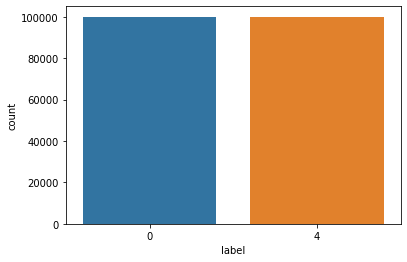

In [ ]:
sns.countplot(train_data['label'])

In [ ]:
from google.colab import files

train_data.to_csv('train_clean_data.csv')
files.download('train_clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>